In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
bb=pd.read_csv('baseball.csv')
bb

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
bb.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
bb.shape

(30, 17)

In [7]:
bb['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [8]:
bb.groupby('CG')['W'].value_counts()

CG  W  
0   71     1
    81     1
    98     1
1   63     1
    68     1
    74     1
    79     1
    80     1
    90     1
    100    1
2   64     1
    83     1
    85     1
    95     1
3   67     1
    78     1
    87     1
4   68     1
    83     1
5   68     1
    86     1
    88     1
6   76     1
    92     1
    97     1
7   74     1
    76     1
    84     1
    93     1
11  81     1
Name: W, dtype: int64

In [9]:
bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

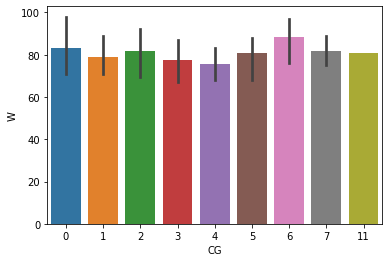

In [10]:
sns.barplot(x='CG',y='W',data=bb)

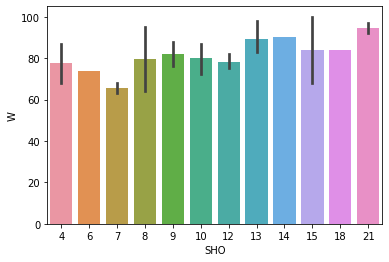

In [11]:
sns.barplot(x='SHO',y='W',data=bb)

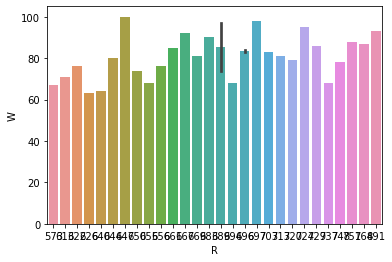

In [12]:
sns.barplot(x='R',y='W',data=bb)

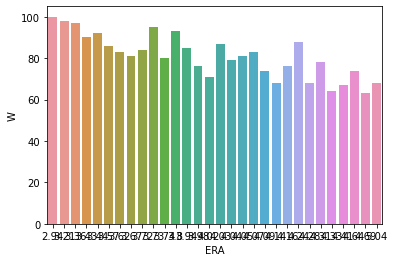

In [13]:
sns.barplot(x='ERA',y='W',data=bb)

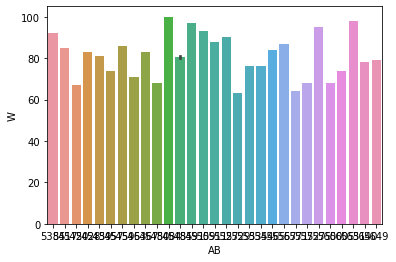

In [14]:
sns.barplot(x='AB',y='W',data=bb)

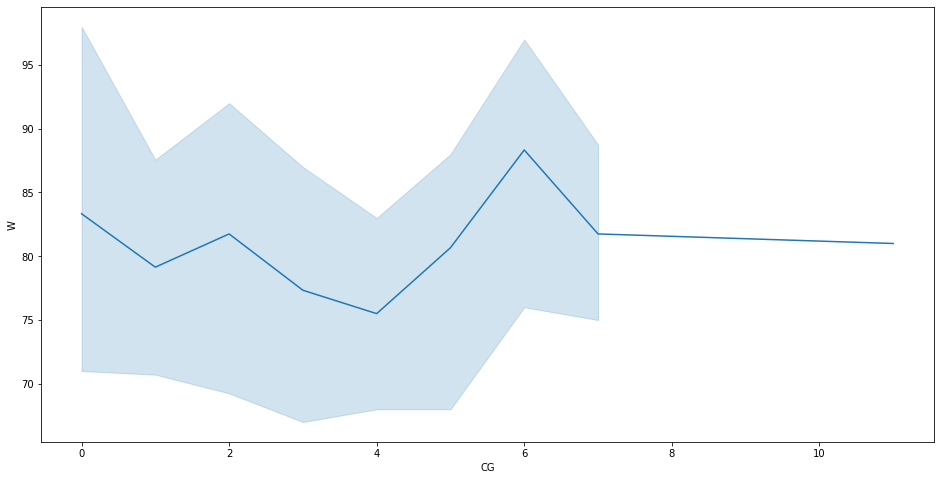

In [15]:
plt.figure(figsize=(16,8))
sns.lineplot(x='CG',y='W',data=bb)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F86B158B50>,
      dtype=object)

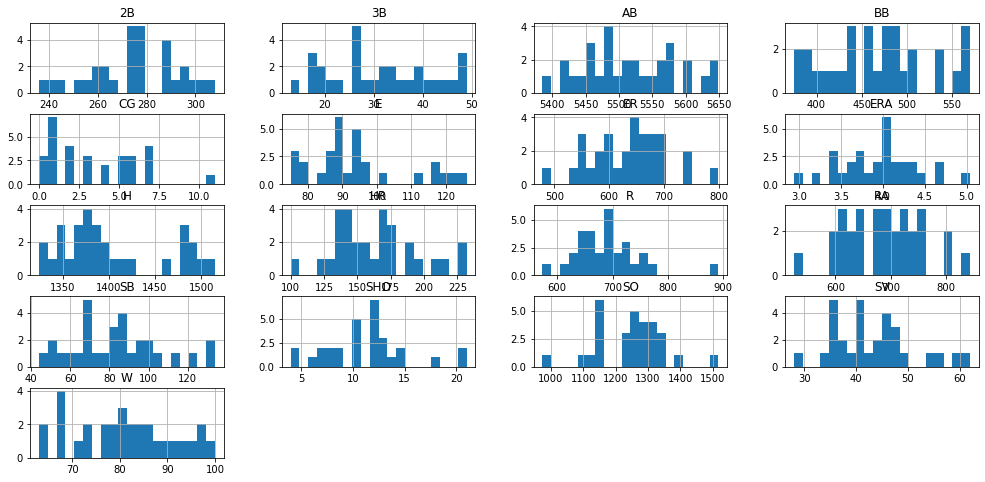

In [18]:
bb.hist(figsize=(17,8),grid=True,bins=20)

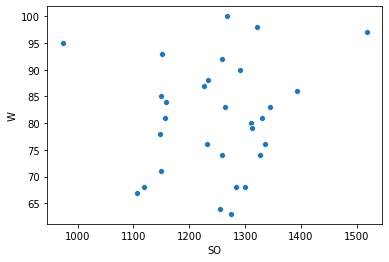

In [19]:
sns.scatterplot(x='SO',y='W',data=bb)

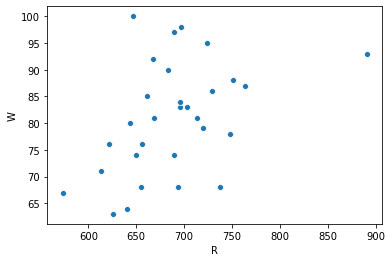

In [21]:
sns.scatterplot(x='R',y='W',data=bb)

In [23]:
bb.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


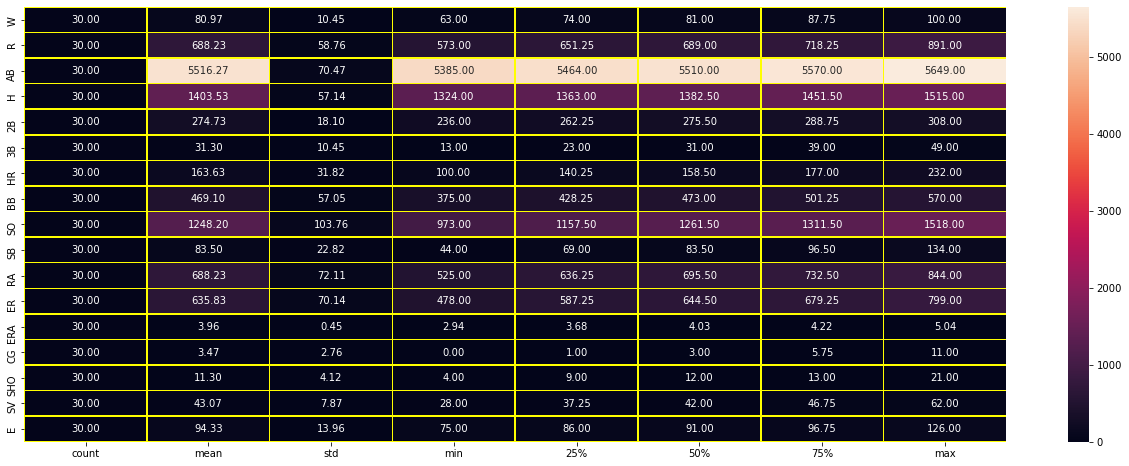

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(bb.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

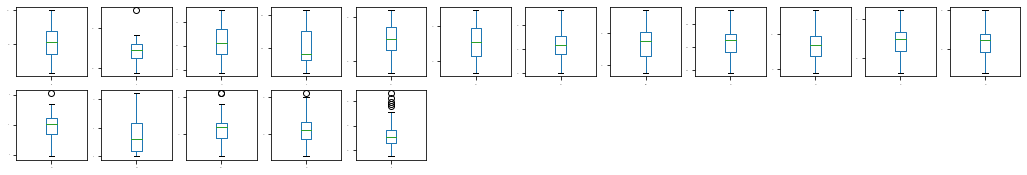

In [27]:
bb.plot(kind='box',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

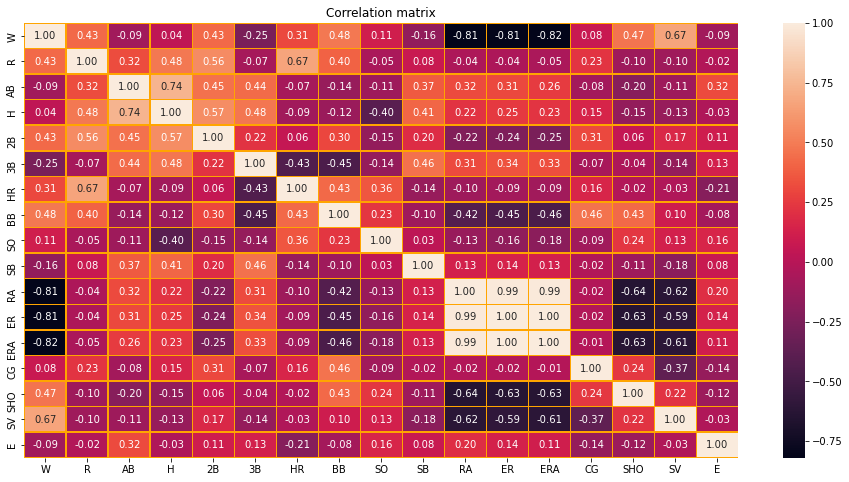

In [28]:
corr=bb.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

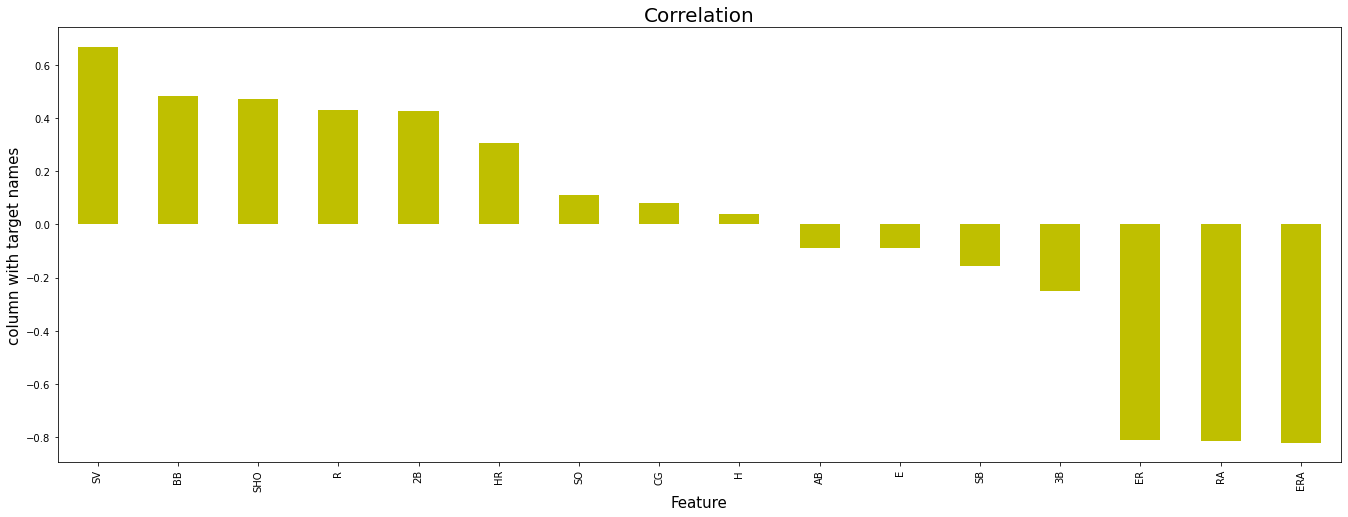

In [29]:
plt.figure(figsize=(23,8))
bb.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

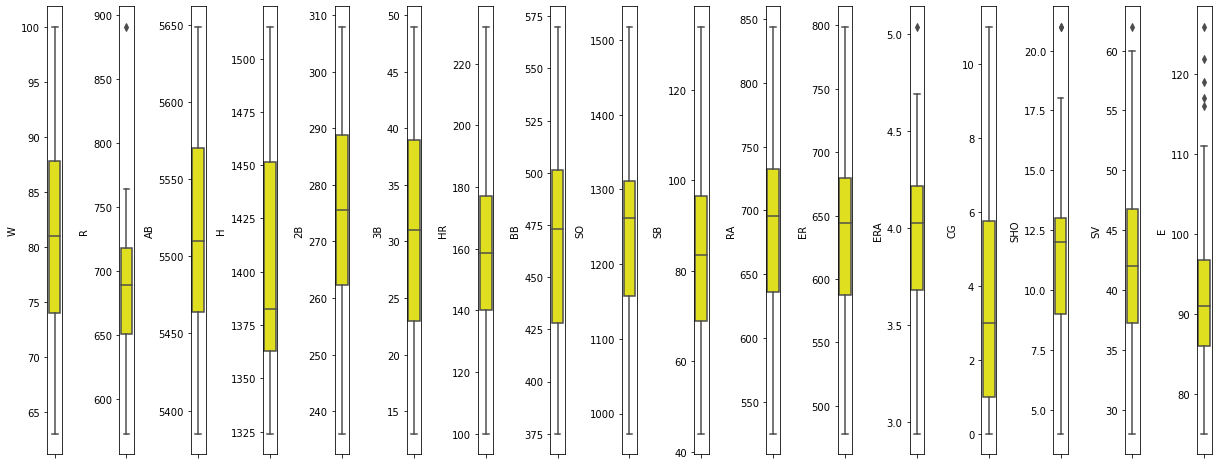

In [30]:
collist=bb.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(bb[collist[i]],color='yellow',orient='v')
    plt.tight_layout()

In [31]:
bb.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

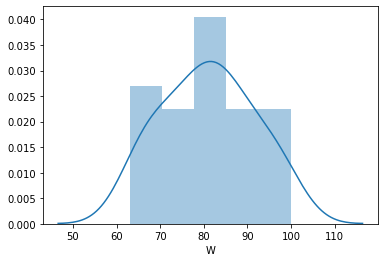

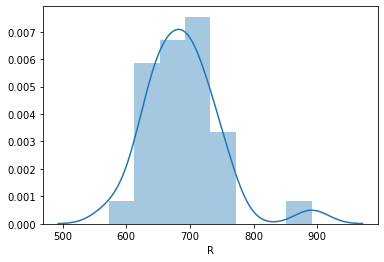

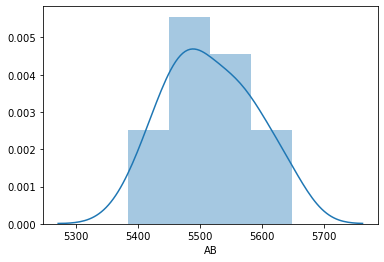

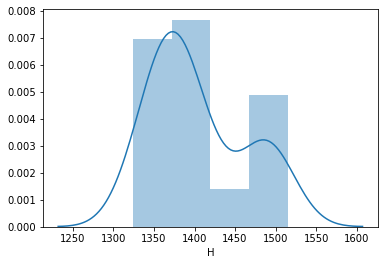

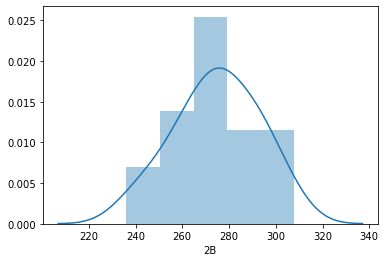

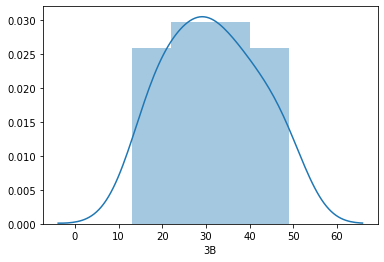

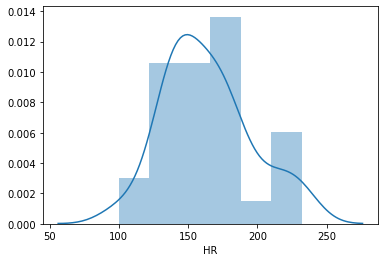

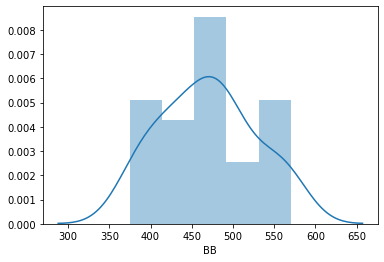

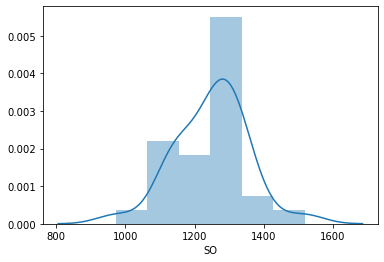

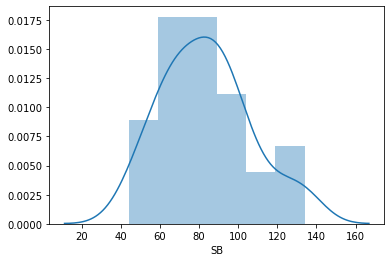

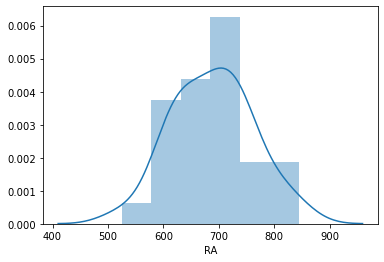

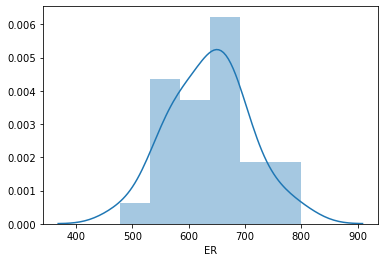

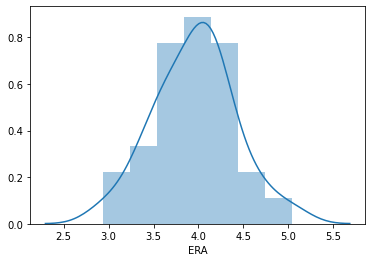

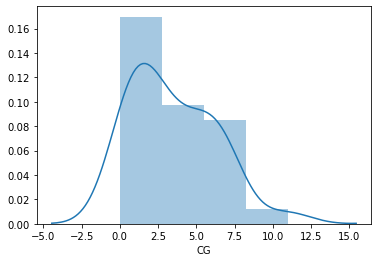

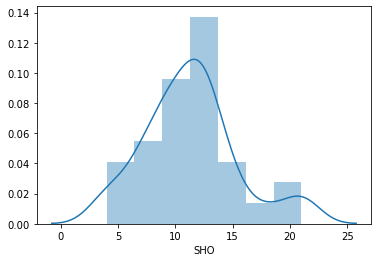

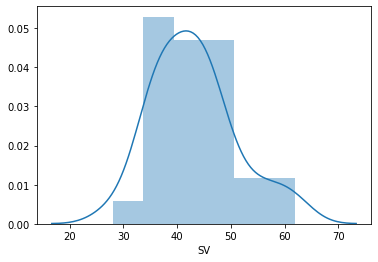

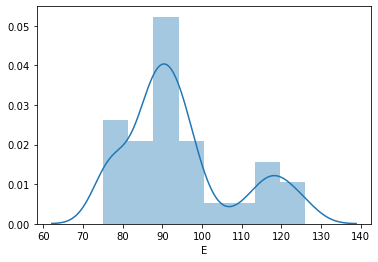

In [32]:
for k in bb.columns:
    plt.figure()
    sns.distplot(bb[k])

In [33]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(bb))
z.shape

(30, 17)

In [34]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [35]:
z[5][1]

3.5096470447193067

In [36]:
bb_new=bb[(z<3).all(axis=1)]
print(bb.shape)
print(bb_new.shape)

(30, 17)
(29, 17)


In [37]:
loss=((30-29)/30)*100
loss

3.3333333333333335

In [38]:
x=bb.drop(['W'],axis=1)
y=bb['W']

In [39]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [40]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [41]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.4855904968593878 on Random_state  1
Best Accuracy is  0.4855904968593878 on Random_state  1
Best Accuracy is  0.5952185843297442 on Random_state  3
Best Accuracy is  0.7762608264498234 on Random_state  4
Best Accuracy is  0.7762608264498234 on Random_state  4
Best Accuracy is  0.7762608264498234 on Random_state  4
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best Accuracy is  0.790454445954885 on Random_state  7
Best

Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.8140371654170155 on Random_state  27
Best Accuracy is  0.81403716541

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=249)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred))

predicted price [79.86615506 94.01585276 59.37557832 81.71303298 63.73678467 79.55477126
 91.17434469 69.56391731 62.50227318]
actual price 28    74
25    92
24    63
12    85
29    68
9     78
0     95
19    64
22    71
Name: W, dtype: int64
Error :-
mean absolute error :- 4.277631394038814
mean squared error :- 22.312501810641727
root mean squared error :- 4.723611098581436
r2_score value :- 0.8181046048045512


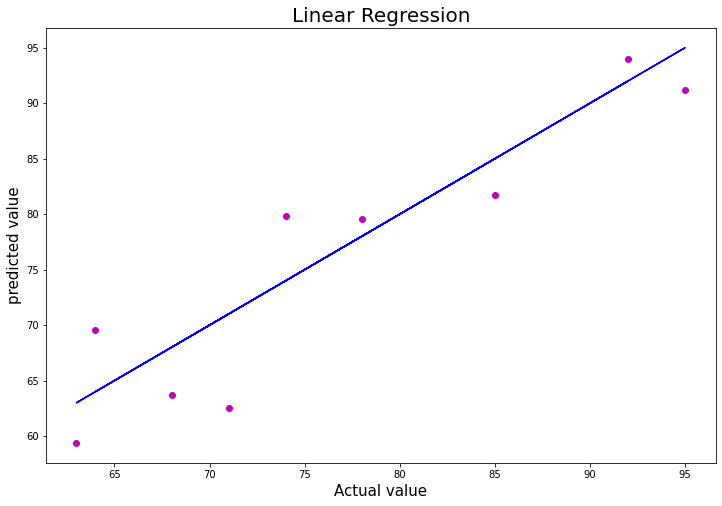

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=pred,color='m')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
en=ElasticNet()
gsp=GridSearchCV(en,parameters)
gsp.fit(x_train,y_train)
print(gsp.best_params_)

{'alpha': 0.1, 'random_state': 1}


In [48]:
en=ElasticNet(alpha=0.1,random_state=1)
en.fit(x_train,y_train)
preden=en.predict(x_test)
r2=r2_score(y_test,preden)

cv_score=cross_val_score(en,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.6460312520808918
0.1613673328504073


In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)

cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.5456868659420289
-0.7944748910631012


In [52]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)

cv_score=cross_val_score(ad,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.5084925461730585
-0.8398201071325211


In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mae')
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2=r2_score(y_test,preddtr)

cv_score=cross_val_score(dtr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.12771739130434778
-1.9306629561300739


In [55]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ln,x,y,cv=5)
print("cross validation score linear regression model",scr.mean())

cross validation score linear regression model -1.4228754457347985


minimum difference is r2score and cross validation score is for AdaBoostRegressor() so this is our best model.

In [58]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)
print(r2)

0.4509945282460809


In [59]:
import joblib
joblib.dump(ad,'baseballmodel.obj')

['baseballmodel.obj']